In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from fractions import Fraction
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [3]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [25]:
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [26]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

In [27]:
posterior.idxmax()

60

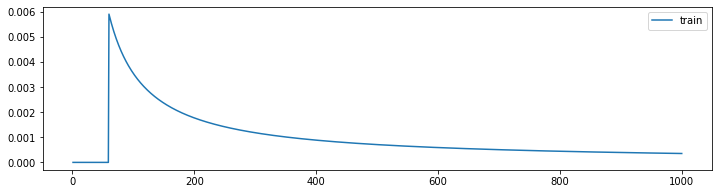

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(posterior, label='train')
plt.legend()
plt.show()

In [14]:
posterior.mean()

333.41989326370776

In [32]:
alpha = 1.0
ps = hypos ** (-alpha)

In [33]:
power = Pmf(ps, hypos, name='power_law')
power.normalize()
power.head()

,probs
1,0.133592
2,0.066796
3,0.044531


In [35]:
hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

1000

In [34]:
dataset = [60]

In [36]:
update_train(uniform, dataset)
update_train(power, dataset)

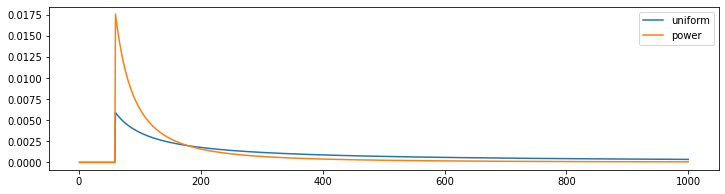

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(uniform, label='uniform')
ax.plot(power, label='power')
plt.legend()
plt.show()

In [38]:
power.mean()

178.5473531797161

In [39]:
power.prob_le(100)

0.43374679026783564

In [43]:
def quantile(pmf, prob):
    total = 0
    for qs, ps in pmf.items():
        total += ps
        if total >= prob:
            return qs
    return np.nan

In [44]:
quantile(power, 0.5)

112

In [51]:
power.quantile([0.05, 0.95]), power.credible_interval(0.9)

(array([ 62., 559.]), array([ 62., 559.]))